In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline  
import squarify 
import missingno as msno 

In [12]:
air_data = pd.read_csv('data.csv' ,encoding='latin1') 

c:\users\shivam mishra\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
air_data.head() 

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [14]:
air_data.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [15]:
air_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
stn_code                       291665 non-null object
sampling_date                  435739 non-null object
state                          435742 non-null object
location                       435739 non-null object
agency                         286261 non-null object
type                           430349 non-null object
so2                            401096 non-null float64
no2                            419509 non-null float64
rspm                           395520 non-null float64
spm                            198355 non-null float64
location_monitoring_station    408251 non-null object
pm2_5                          9314 non-null float64
date                           435735 non-null object
dtypes: float64(5), object(8)
memory usage: 43.2+ MB


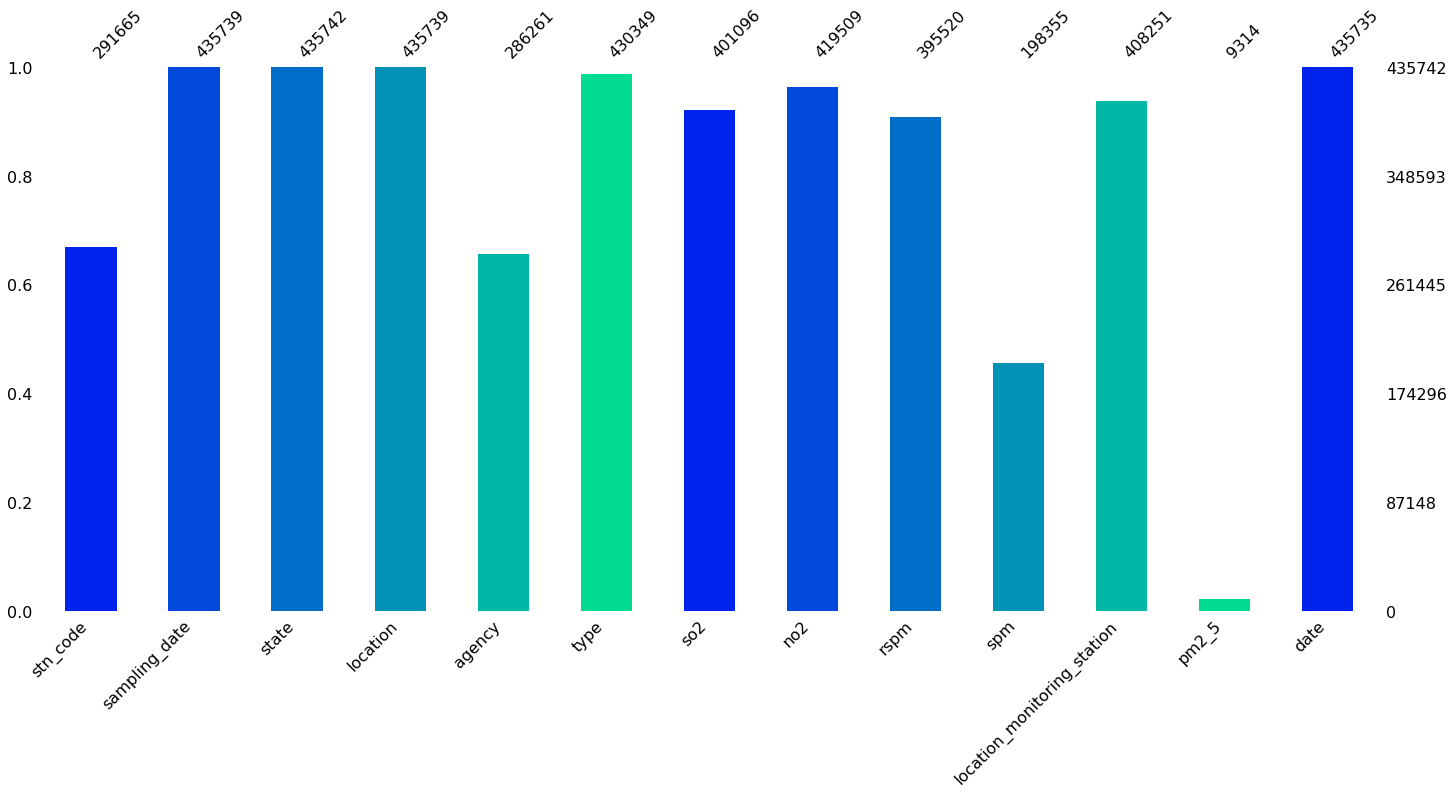

In [16]:
msno.bar(air_data,color=sns.color_palette( 'winter')) 

In [17]:
pmpercent = air_data.pm2_5.isnull().sum()/len(air_data.sampling_date)*100 
pmpercent = "{0:.3}".format(pmpercent)
print('Total percentage of missing values of PM2_5 is ',pmpercent,'%')

Total percentage of missing values of PM2_5 is  97.9 %


In [18]:
air_data.drop('pm2_5',axis = 1,inplace=True) 

In [19]:
air_data.spm = air_data['spm'].fillna(air_data['spm'].mean()) 
air_data.rspm = air_data['rspm'].fillna(air_data['rspm'].mean()) 
air_data.so2 = air_data['so2'].fillna(air_data['so2'].mean()) 
air_data.no2 = air_data['no2'].fillna(air_data['no2'].mean()) 

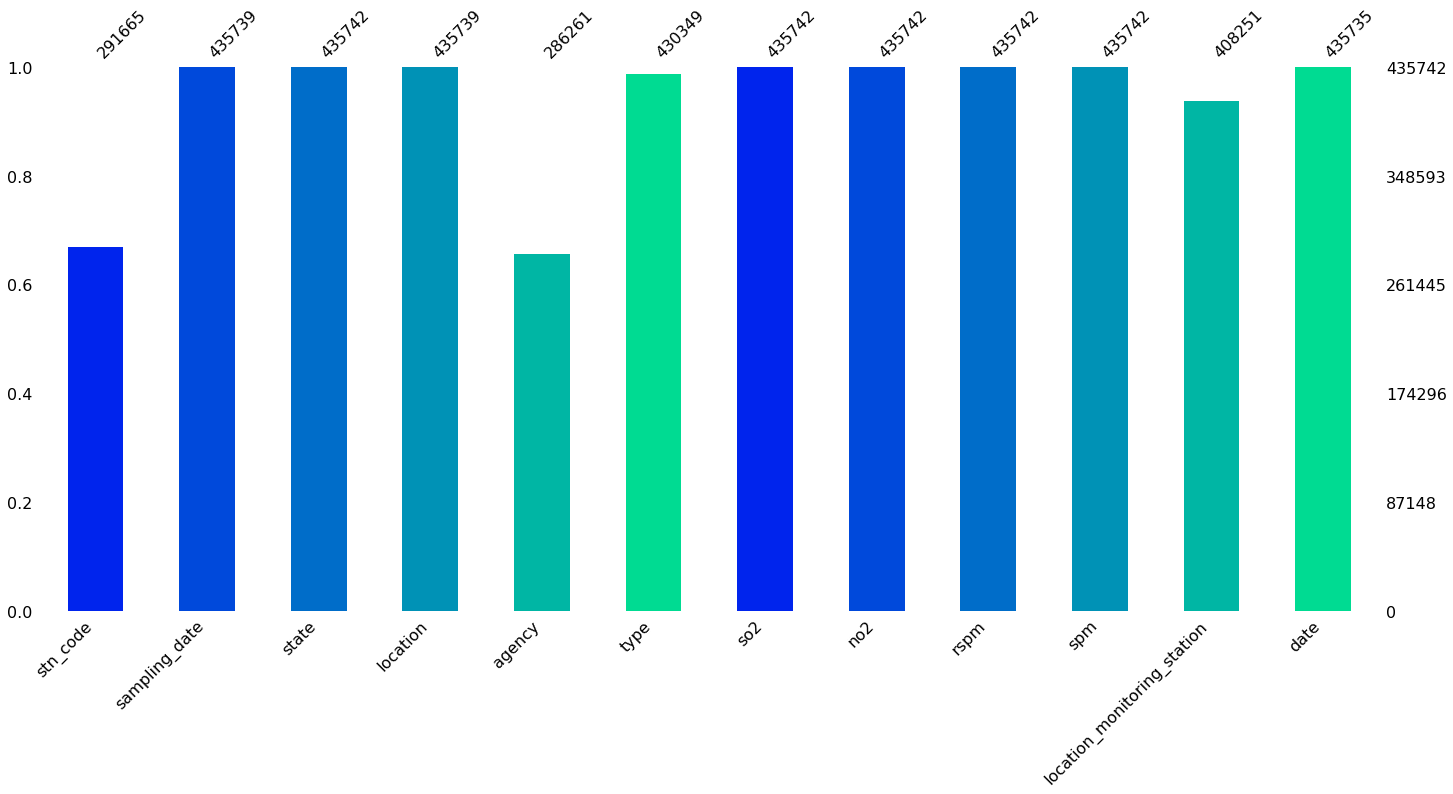

In [20]:
msno.bar(air_data,color=sns.color_palette('winter'))

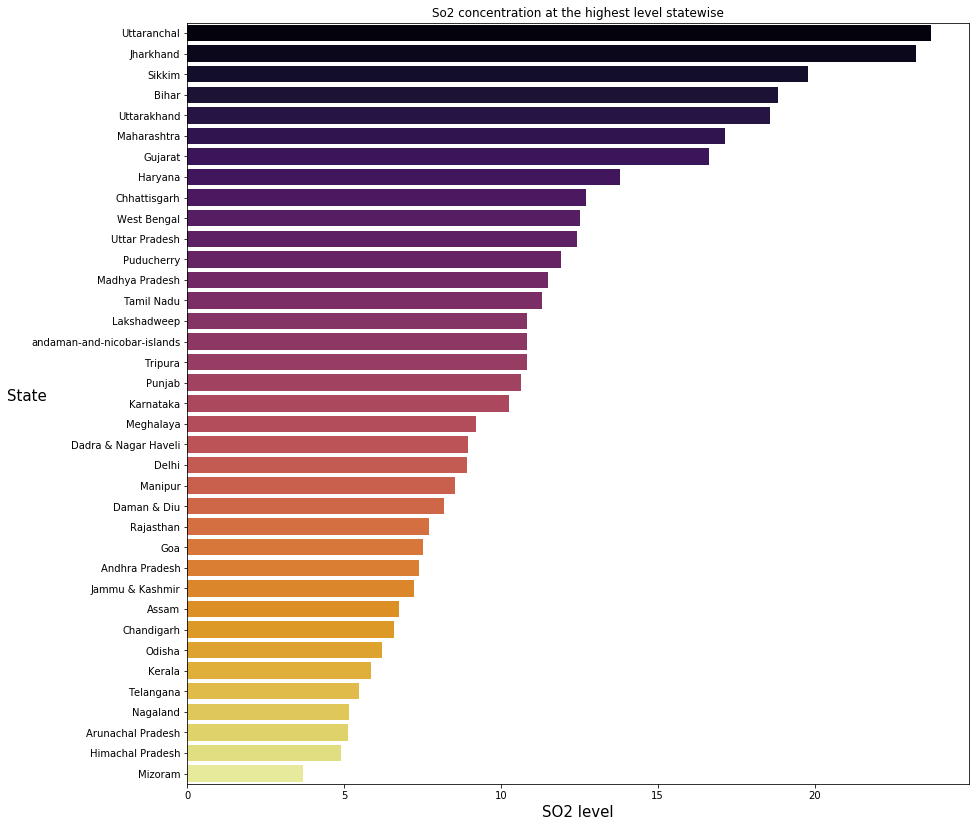

In [21]:
plt.figure(figsize = (14,14)) 
so2_level  = air_data.groupby(['state']).mean()['so2'].sort_values(ascending = False ).to_frame()
sns.barplot(x = 'so2', y = so2_level.index ,data = so2_level,palette='inferno') 
plt.title('So2 concentration at the highest level statewise') 
plt.xlabel('SO2 level',fontsize = 15) 
plt.ylabel('State',fontsize = 15,rotation = 'horizontal')
plt.savefig('so2bar.png')

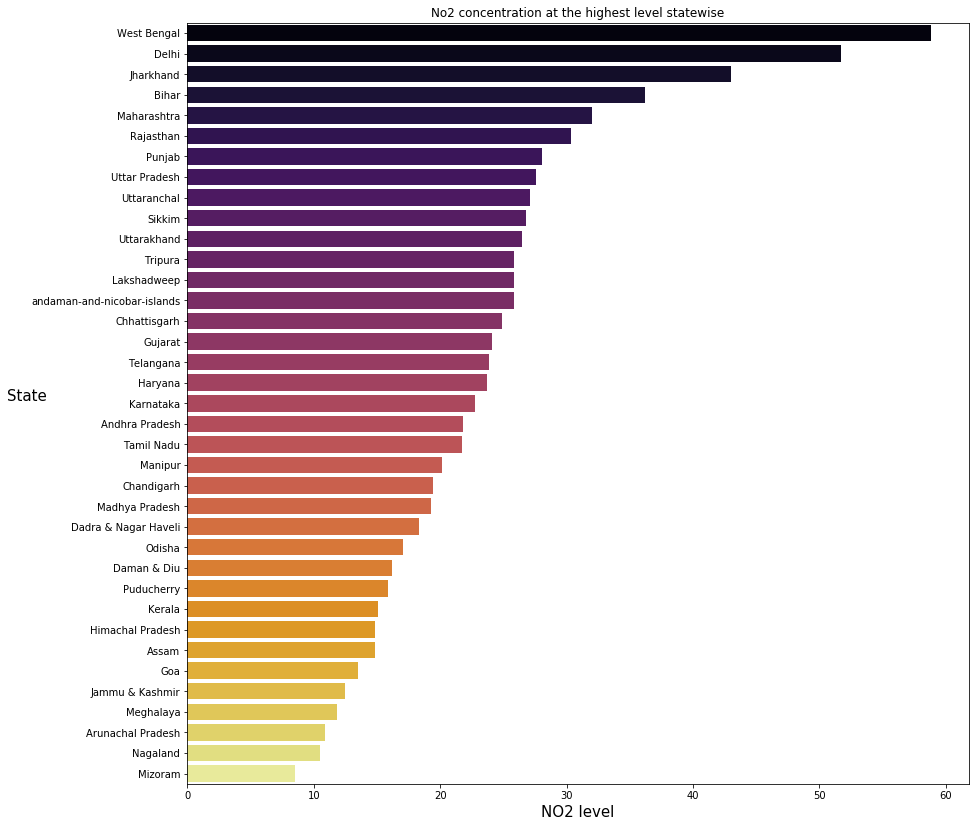

In [22]:
plt.figure(figsize = (14,14)) 
so2_level  = air_data.groupby(['state']).mean()['no2'].sort_values(ascending = False ).to_frame()
sns.barplot(x = 'no2', y = so2_level.index ,data = so2_level,palette='inferno') 
plt.title('No2 concentration at the highest level statewise')
plt.xlabel('NO2 level',fontsize = 15) 
plt.ylabel('State',fontsize = 15,rotation = 'horizontal') 
plt.savefig('No2bar.png')

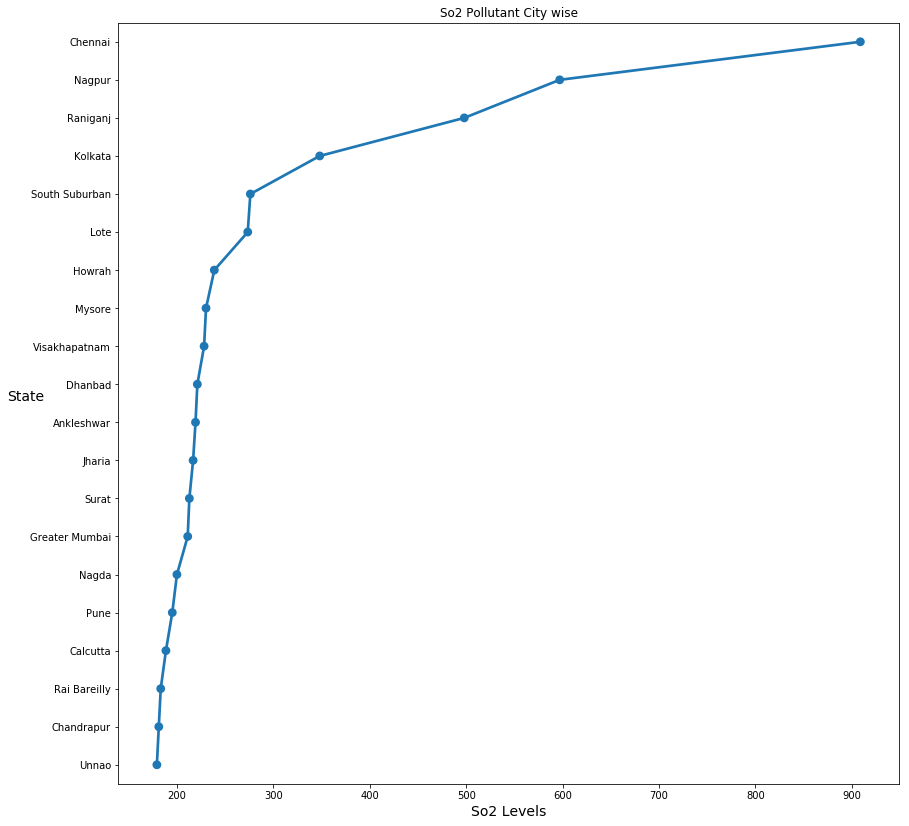

In [23]:
plt.figure(figsize = (14,14)) 
so2bycity = air_data.groupby(['location']).max()['so2'].sort_values(ascending=False).to_frame()[:20] 
sns.pointplot(x = so2bycity['so2'], y = so2bycity.index,data = so2bycity) 
plt.title('So2 Pollutant City wise') 
plt.xlabel('So2 Levels',fontsize=14) 
plt.ylabel('State',fontsize = 14,rotation = 'horizontal')
plt.savefig('s02chron.png')

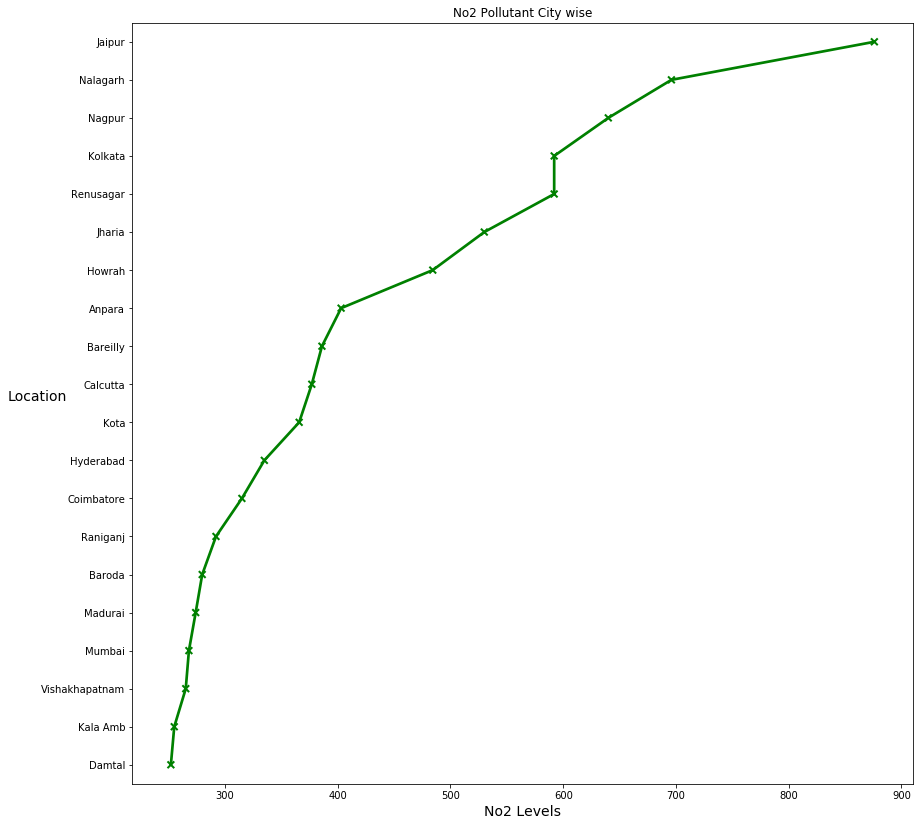

In [24]:
plt.figure(figsize = (14,14))
no2byloc = air_data.groupby(['location']). max()['no2'].sort_values(ascending=False). to_frame()[:20] 
sns.pointplot(x  = no2byloc['no2'], y = no2byloc.index,data = no2byloc,color = 'g',markers='x')
plt.title('No2 Pollutant City wise')
plt.xlabel('No2 Levels',fontsize=14) 
plt.ylabel('Location',fontsize = 14,rotation = 'horizontal') 
plt.savefig('No2chron.png')


In [25]:
air_data['type'].unique() 

array(['Residential, Rural and other Areas', 'Industrial Area', nan,
       'Sensitive Area', 'Industrial Areas', 'Residential and others',
       'Sensitive Areas', 'Industrial', 'Residential', 'RIRUO',
       'Sensitive'], dtype=object)

In [26]:
air_data['type']=air_data['type'].replace (['Sensitive Area','Sensitive'],(['Sensitive Areas','Sensitive Areas'])) 
air_data['type']=air_data['type'].replace (['Industrial Area','Industrial'],(['Industrial Areas','Industrial Areas'])) 
air_data['type']=air_data['type'].replace (['Residential','Residential and others'], (['Residential, Rural and other Areas','Residential, Rural and other Areas']))

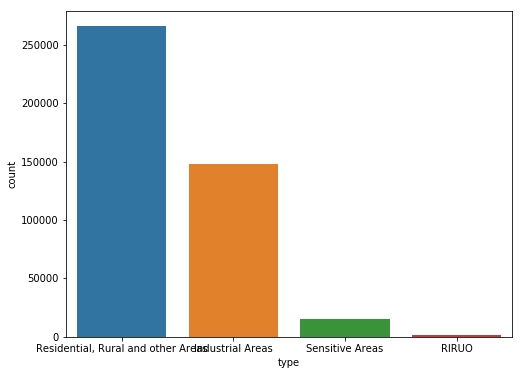

In [27]:
plt.figure(figsize = (8,6))
sns.countplot(air_data['type'])
plt.savefig('indus.png')

In [28]:
so2_data = air_data['so2'].fillna(air_data ['so2'].mean()) 

In [29]:
so2_data = pd.DataFrame(so2_data,columns=[ 'so2'])

In [30]:
so2_data.head()

,so2
0,4.8
1,3.1
2,6.2
3,6.3
4,4.7


In [31]:
air_data.so2.mean()

10.829414322672587

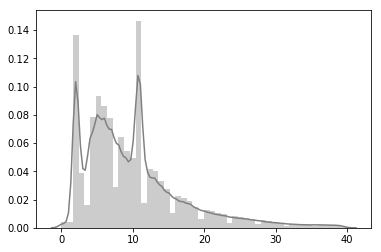

In [32]:
sns.distplot(so2_data[so2_data['so2']<40], color= 'gray')
plt.savefig('so2mean.png')

In [33]:
no2_data = air_data['no2'].fillna(air_data ['no2'].mean()) 

In [34]:
no2_data = pd.DataFrame(no2_data,columns=[ 'no2']) 

In [35]:
no2_data.head()

,no2
0,17.4
1,7.0
2,28.5
3,14.7
4,7.5


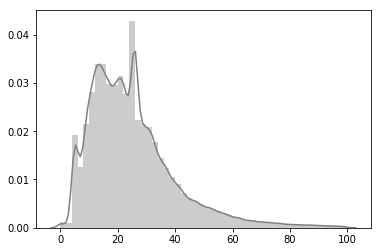

In [36]:
sns.distplot(no2_data[no2_data['no2']<100 ],color= 'gray')
plt.savefig('no2mean.png')

In [37]:
air_data.no2.mean()

25.80962289781127

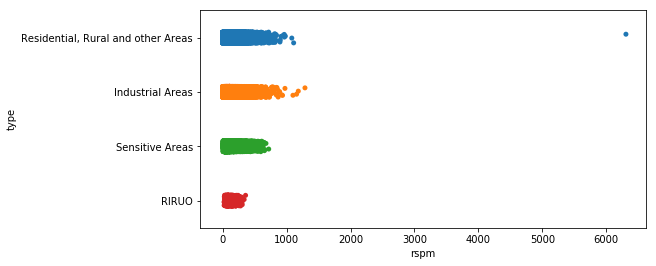

In [38]:
plt.figure(figsize=(8,4))
sns.stripplot(x = 'rspm',y= 'type',data = air_data) 
plt.savefig('strip.png')

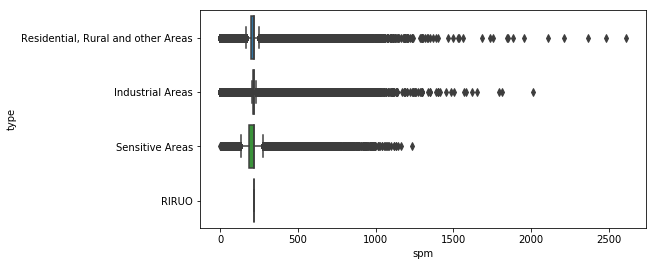

In [39]:
plt.figure(figsize=(8,4)) 
sns.boxplot(x = 'spm',y= 'type',data = air_data) 
plt.savefig('bloxplot.png')

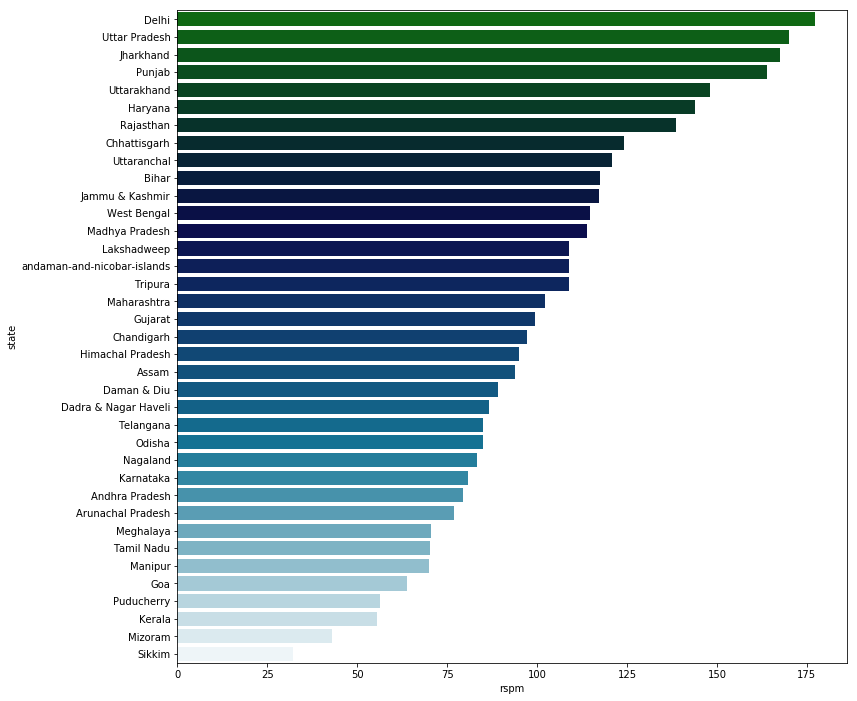

In [40]:
plt.figure(figsize=(12,12)) 
rspm_data = air_data.groupby(['state']).mean()['rspm'].sort_values(ascending = False ).to_frame()
sns.barplot(x = 'rspm' , y = rspm_data.index,data = rspm_data,palette='ocean') 
plt.savefig('rspmbar.png')

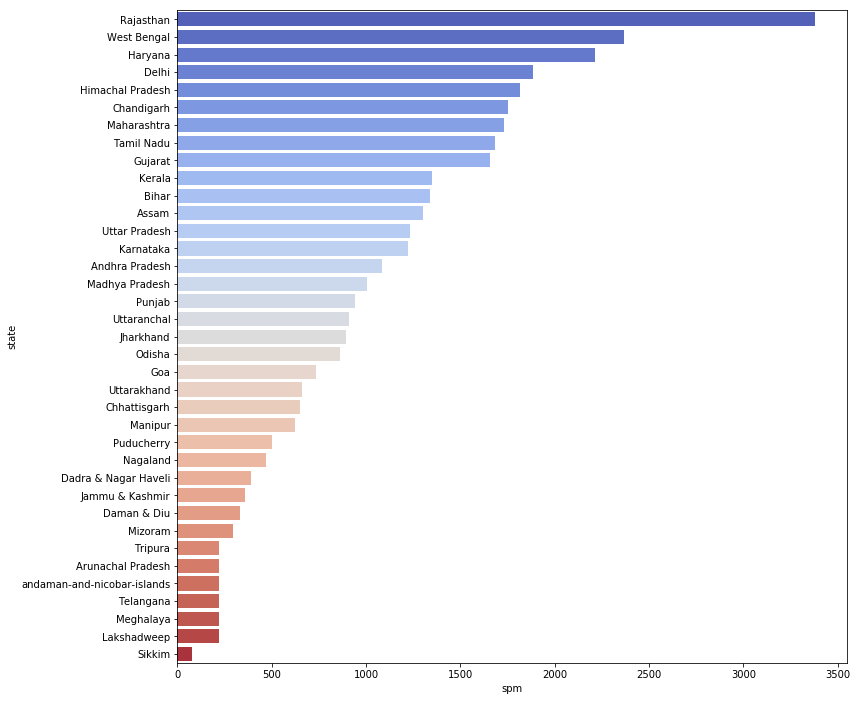

In [41]:
plt.figure(figsize=(12,12)) 
rspm_data = air_data.groupby(['state']).max()['spm'].sort_values(ascending = False). to_frame() 
sns.barplot(x = 'spm' , y = rspm_data.index,data = rspm_data,palette='coolwarm') 
plt.savefig('spmbar.png')

In [42]:
def calculate_si(so2):   
    si=0   
    if (so2<=40):   
        si= so2*(50/40) 
    if (so2>40 and so2<=80):    
        si= 50+(so2-40)*(50/40)   
    if (so2>80 and so2<=380):  
        si= 100+(so2-80)*(100/300)  
    if (so2>380 and so2<=800):   
        si= 200+(so2-380)*(100/800) 
    if (so2>800 and so2<=1600): 
        si= 300+(so2-800)*(100/800) 
    if (so2>1600):   
        si= 400+(so2-1600)*(100/800)  
    return si
air_data['si']=air_data['so2'].apply(calculate_si)
df= air_data[['so2','si']]
df.head()

,so2,si
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


In [43]:
def calculate_ni(no2):
    ni=0
    if(no2<=40):
        ni= no2*50/40
    elif(no2>40 and no2<=80):
        ni= 50+(no2-14)*(50/40)
    elif(no2>80 and no2<=180):
        ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
        ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
        ni= 300+(no2-280)*(100/120)
    else:
        ni= 400+(no2-400)*(100/120)
    return ni
air_data['ni']=air_data['no2'].apply(calculate_ni)
df= air_data[['no2','ni']]
df.head()

,no2,ni
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


In [44]:
def calculate_(rspm):
    rpi=0
    if(rpi<=30):
        rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
        rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
        rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
        rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
        rpi=300+(rpi-120)*(100/130)
    else:
        rpi=400+(rpi-250)*(100/130)
    return rpi
air_data['rpi']=air_data['rspm'].apply(calculate_si)
df= air_data[['rspm','rpi']]
df.tail()


,rspm,rpi
435737,143.000000,121.000000
435738,171.000000,130.333333
435739,108.832784,109.610928
435740,108.832784,109.610928
435741,108.832784,109.610928


In [45]:
def calculate_spi(spm):
    spi=0
    if(spm<=50):
        spi=spm
    if(spm<50 and spm<=100):
        spi=spm
    elif(spm>100 and spm<=250):
        spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
        spi=200+(spm-250)
    elif(spm>350 and spm<=450):
        spi=300+(spm-350)*(100/80)
    else:
        spi=400+(spm-430)*(100/80)
    return spi
air_data['spi']=air_data['spm'].apply(calculate_spi)
df= air_data[['spm','spi']]
df.tail()


,spm,spi
435737,220.78348,180.52232
435738,220.78348,180.52232
435739,220.78348,180.52232
435740,220.78348,180.52232
435741,220.78348,180.52232


In [46]:
def calculate_aqi(si,ni,spi,rpi):
    aqi=0
    if(si>ni and si>spi and si>rpi):
        aqi=si
    if(spi>si and spi>ni and spi>rpi):
        aqi=spi
    if(ni>si and ni>spi and ni>rpi):
        aqi=ni
    if(rpi>si and rpi>ni and rpi>spi):
        aqi=rpi
    return aqi
air_data['AQI']=air_data.apply(lambda x:calculate_aqi(x['si'],x['ni'],x['spi'],x['rpi']),axis=1)
df= air_data[['sampling_date','state','si','ni','rpi','spi','AQI']]
df.head()


,sampling_date,state,si,ni,rpi,spi,AQI
0,February - M021990,Andhra Pradesh,6.000,21.750,109.610928,180.52232,180.52232
1,February - M021990,Andhra Pradesh,3.875,8.750,109.610928,180.52232,180.52232
2,February - M021990,Andhra Pradesh,7.750,35.625,109.610928,180.52232,180.52232
3,March - M031990,Andhra Pradesh,7.875,18.375,109.610928,180.52232,180.52232
4,March - M031990,Andhra Pradesh,5.875,9.375,109.610928,180.52232,180.52232


In [47]:
df.state.unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
       'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Uttar Pradesh',
       'Uttarakhand', 'Uttaranchal', 'West Bengal',
       'andaman-and-nicobar-islands', 'Lakshadweep', 'Tripura'],
      dtype=object)

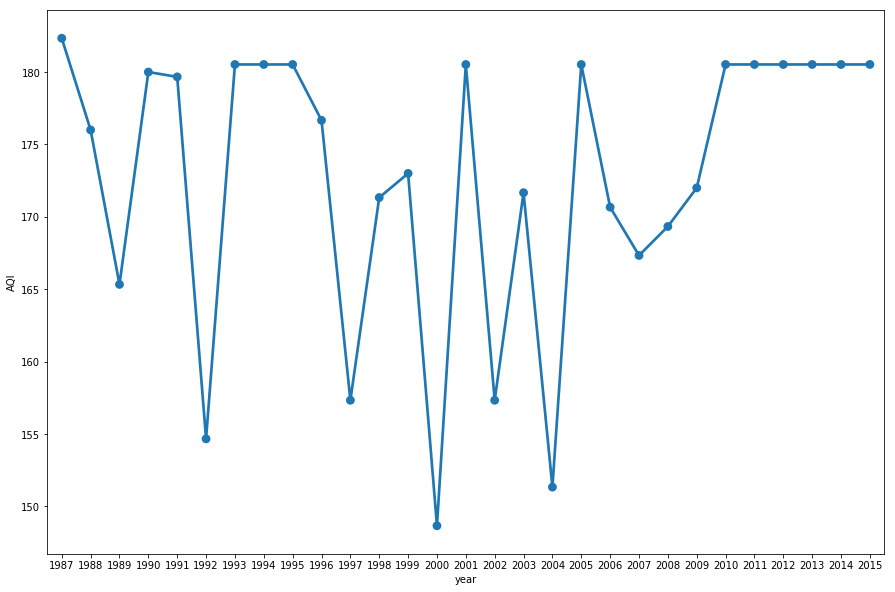

In [48]:
air_data['date'] = pd.to_datetime(air_data['date'],format='%Y-%m-%d') # date parse
air_data['year'] = air_data['date'].dt.year # year
air_data['year'] = air_data['year'].fillna(0.0).astype(int)
air_data = air_data[(air_data['year']>0)]
df = air_data[['AQI','year','state']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(15,10))
sns.pointplot(x='year', y='AQI', data=df)
plt.savefig('aqi1.png')

In [49]:
import warnings
import itertools
import dateutil
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline
df=air_data[['AQI','date']]
df["date"] = pd.to_datetime(df['date'])
df.tail(20)


c:\users\shivam mishra\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,AQI,date
435719,180.52232,2015-10-23
435720,180.52232,2015-10-28
435721,180.52232,2015-10-31
435722,180.52232,2015-11-05
435723,180.52232,2015-11-07
435724,180.52232,2015-11-10
435725,180.52232,2015-11-11
435726,180.52232,2015-11-16
435727,180.52232,2015-11-20
435728,180.52232,2015-11-26


In [50]:
df=df.set_index('date').resample('M')["AQI"].mean()
df.head()


date
1987-01-31    255.309830
1987-02-28    249.921829
1987-03-31    316.697252
1987-04-30    227.085685
1987-05-31    325.301352
Freq: M, Name: AQI, dtype: float64

In [68]:
air_data=df.reset_index(level=0, inplace=False)
air_data = air_data[np.isfinite(air_data['AQI'])]
air_data=air_data[air_data.date != '1970-01-31']
air_data = air_data.reset_index(drop=True)
air_data.head()

,date,AQI
0,1987-01-31,255.309830
1,1987-02-28,249.921829
2,1987-03-31,316.697252
3,1987-04-30,227.085685
4,1987-05-31,325.301352


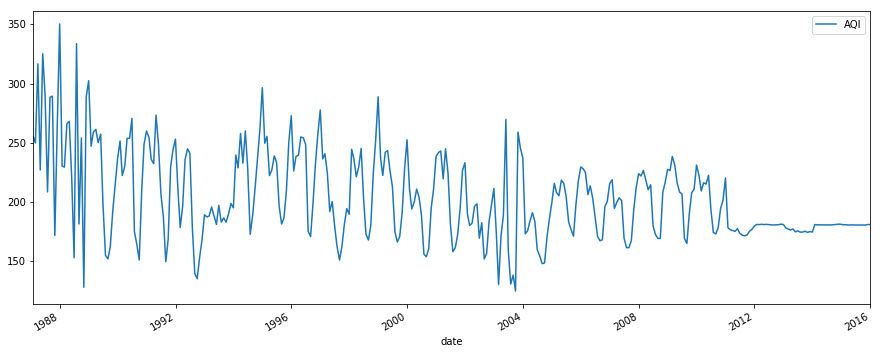

In [69]:
df=air_data.set_index('date')
df.sort_values(by='date',ascending=False)
df.plot(figsize=(15, 6))
plt.savefig('aqi2.png')
y=df.AQI

In [62]:
n = df.shape[0]
train_size = 0.65
features_dataframe = df.sort_values('date')
train = df.iloc[:int(n * train_size)]
test = df.iloc[int(n * train_size):]

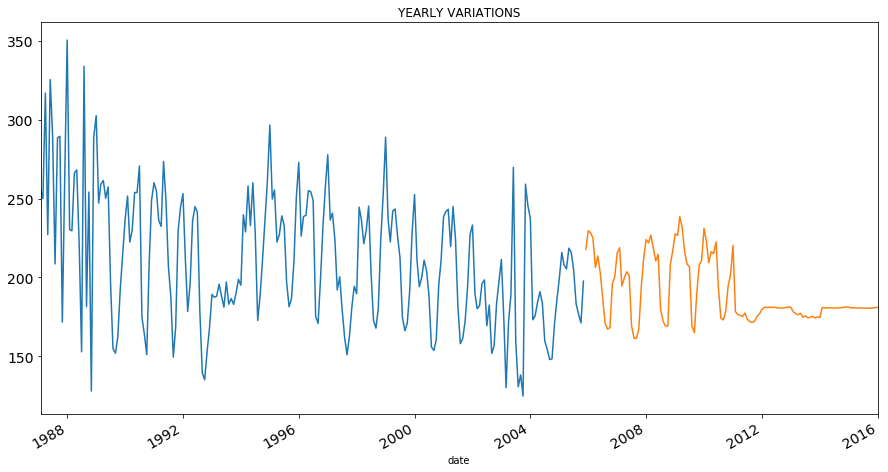

In [63]:
train.AQI.plot(figsize=(15,8), title= 'YEARLY VARIATIONS', fontsize=14)
test.AQI.plot(figsize=(15,8), title= 'YEARLY VARIATIONS', fontsize=14)
plt.savefig('yearaqi.png')

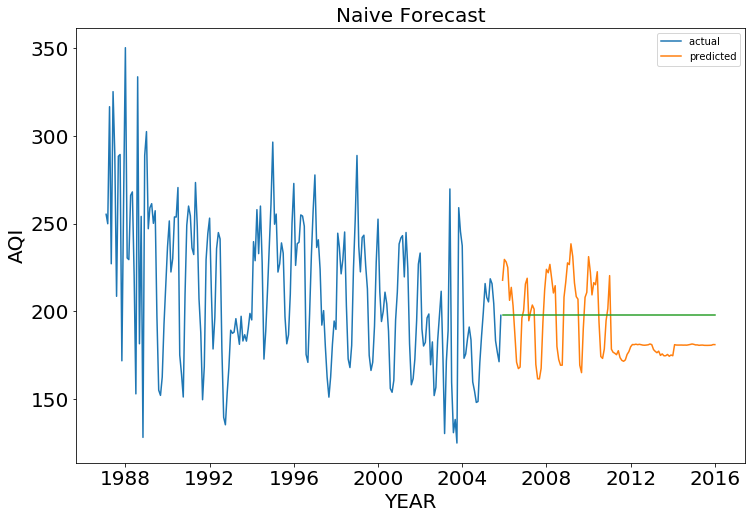

In [70]:
dd= np.asarray(train.AQI)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['AQI'], label='Train')
plt.plot(test.index,test['AQI'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast",fontsize=20)
plt.legend(["actual ","predicted"])
plt.xlabel("YEAR",fontsize=20)
plt.ylabel("AQI",fontsize=20)
plt.tick_params(labelsize=20)
plt.savefig('naive.png')

c:\users\shivam mishra\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  """Entry point for launching an IPython kernel.


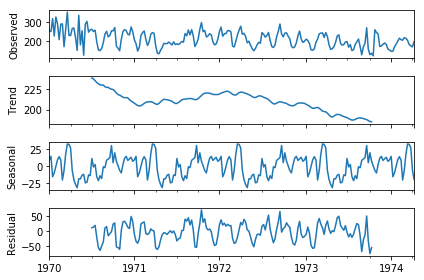

In [71]:
train.index=pd.DatetimeIndex(freq="w", start=0 ,periods=224)
sm.tsa.seasonal_decompose(train.AQI).plot()
result = sm.tsa.stattools.adfuller(train.AQI)
plt.savefig('observe.png')


In [73]:
from IPython.display import HTML
from IPython.display import Image
Image(url= "https://i1.wp.com/images.mapsofindia.com/liveblog/2019/04/air-quality-index-of-the-biggest-cities-in-india-11-04-19.jpg?fit=750%2C876&ssl=1")